In [48]:
import numpy as np
import pandas as pd

In [49]:
data = pd.read_csv('./datasets/spambase_all.csv')

In [50]:
data.shape

(4601, 58)

<AxesSubplot:>

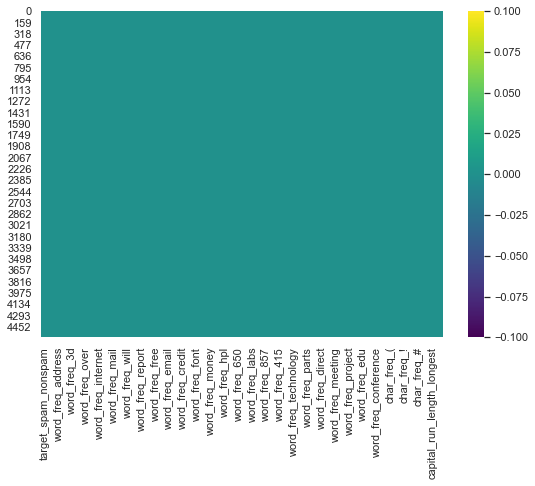

In [51]:
import seaborn as sns
sns.set(rc={"figure.figsize":(9, 6)})
sns.heatmap(data.isnull(), cmap='viridis')

In [52]:
data.isnull()

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

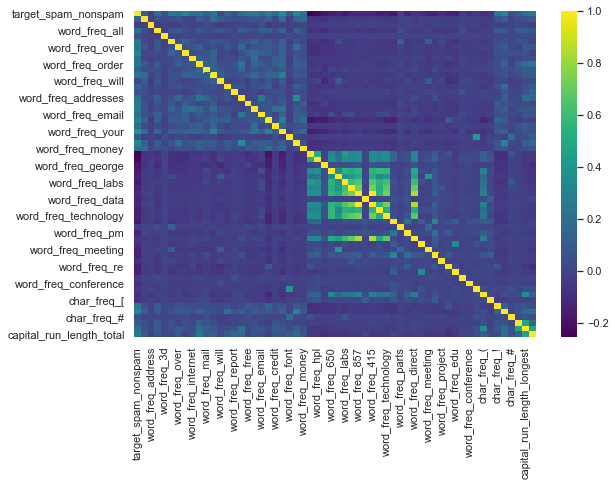

In [53]:
sns.heatmap(data.corr(), cmap='viridis')

In [54]:
corr = data.corr()

In [55]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [56]:
selected_columns = data.columns[columns]
selected_columns.shape

(57,)

In [57]:
data = data[selected_columns]

In [58]:
selected_columns

Index(['target_spam_nonspam', 'word_freq_make', 'word_freq_address',
       'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font',
       'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
       'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_confere

In [59]:
selected_columns = selected_columns[1:].values         # Removing the dignosis column

In [60]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [61]:
data.iloc[:,0]

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: target_spam_nonspam, Length: 4601, dtype: int64

In [62]:
#https://vishalramesh.substack.com/p/feature-selection-correlation-and-p-value-da8921bfb3cf?r=9u6n7&s=w&utm_campaign=post&utm_medium=web

SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [63]:
selected_columns

array(['word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_people', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font',
       'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'word_freq_labs',
       'word_freq_data', 'word_freq_technology', 'word_freq_parts',
       'word_freq_meeting', 'word_freq_original', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'char_freq_;', 'char_freq_(',
       'char_freq_!', 'char_freq_$', 'char_freq_#',
       'capital_run_length_average', 'capital_run_length_total'],
      dtype=object)

In [64]:
result = pd.DataFrame()
result['target_spam_nonspam'] = data.iloc[:,0]

In [65]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data.shape

(4601, 37)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_scores=[]
list_models=[]
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)


pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('logisticRegression')

D:\x-20a\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [68]:
list_scores

[0.9348534201954397]

## Statsmodels

In [69]:
import statsmodels.api as sm

logitReg = sm.Logit(y_train, x_train)
logit_fit = logitReg.fit()

Optimization terminated successfully.
         Current function value: 0.238740
         Iterations 14


In [70]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3680
Model:                          Logit   Df Residuals:                     3643
Method:                           MLE   Df Model:                           36
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.6442
Time:                        18:00:02   Log-Likelihood:                -878.56
converged:                       True   LL-Null:                       -2469.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0734      0.119     -0.614      0.539      -0.308       0.161
x2             3.0369      1.941      1.565      0.118      -0.767       6.841
x3             0.2422      0.094      2.576      0.010       0.058       0.426
x4             0.5177      0.250      2.073      0.038       0.028       1.007
x5             2.4964      0.395      6.319      0.000       1.722       3.271
x6             0.3278      0.181      1.809      0.070      -0.027       0.683
x7             1.1278      0.337      3.347      0.001       0.467       1.788
x8            -0.0423      0.072     -0.589      0.556      -0.183       0.099
x9            -0.1566      0.218     -0.719      0.472      -0.584       0.271
x10            0.8655      0.159      5.428      0.000       0.553       1.178
x11            0.9310      0.230      4.050      0.000       0.481       1.382
x12            0.1602      0.124      1.290      0.197      -0.083       0.403
x13           -0.1397      0.035     -3.970      0.000      -0.209      -0.071
x14            0.6328      0.347      1.825      0.068      -0.047       1.312
x15            0.0626      0.048      1.299      0.194      -0.032       0.157
x16            0.2547      0.182      1.400      0.162      -0.102       0.611
x17            1.9554      0.435      4.491      0.000       1.102       2.809
x18            0.3529      0.146      2.420      0.016       0.067       0.639
x19           -2.1804      0.326     -6.683      0.000      -2.820      -1.541
x20           -1.9214      0.496     -3.873      0.000      -2.894      -0.949
x21           -9.3206      2.198     -4.240      0.000     -13.629      -5.012
x22           -1.0533      0.565     -1.865      0.062      -2.160       0.054
x23           -1.1543      0.303     -3.807      0.000      -1.749      -0.560
x24           -0.2506      0.303     -0.826      0.409      -0.845       0.344
x25           -0.7437      0.444     -1.673      0.094      -1.615       0.127
x26           -3.6342      1.083     -3.355      0.001      -5.757      -1.511
x27           -1.5758      0.795     -1.982      0.047      -3.134      -0.018
x28           -1.0797      0.180     -6.001      0.000      -1.432      -0.727
x29           -2.9387      0.456     -6.438      0.000      -3.833      -2.044
x30           -2.6646      1.656     -1.609      0.108      -5.910       0.580
x31           -1.6384      0.545     -3.006      0.003      -2.707      -0.570
x32           -1.2968      0.341     -3.798      0.000      -1.966      -0.628
x33            0.3458      0.094      3.676      0.000       0.161       0.530
x34            6.1416      0.883      6.954      0.000       4.411       7.873
x35            1.1851      0.751      1.578      0.115      -0.287       2.657
x36            0.0151      0.014      1.047      0.295      -0.013       0.043
x37            0.0003      0.000      2.421      0.015    6.57e-05       0.001
==============================================================================

P